In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import seaborn as sns
from matplotlib import colormaps
from result import *
from adjustText import adjust_text

def load_pkl(path):
    with open(path, 'rb') as file:
        loaded_dict = pickle.load(file)
    return loaded_dict

FILTERING_S_ALG = ['S_LONGEST', 'S_EARLIEST', 'S_RANDOM']
FILTERING_C_ALG = ['C_EARLIEST', 'C_RANDOM']
FILTERING_UE_ALG = ['UE_LONGEST', 'UE_RANDOM']
FILTERING_ACCESS_OPPORTUNITIES_ALG = ['4', 'x8', 'x12']
FILTER_MAX_AND_MIN = True
FILTER_PERCENT = 0.2


directory_path = './'
result = {}

# Loop through the files in the directory
for filename in os.listdir(directory_path):
    # Check if the file ends with .pkl
    if filename.endswith('.pkl'):
        source_alg = filename[:-4].split('|')[0]
        candidate_alg = filename[:-4].split('|')[1]
        ue_alg = filename[:-4].split('|')[2]
        access_opportunities = filename[:-4].split('|')[3]
        if (source_alg in FILTERING_S_ALG
        and candidate_alg in FILTERING_C_ALG
        and ue_alg in FILTERING_UE_ALG
        and access_opportunities in FILTERING_ACCESS_OPPORTUNITIES_ALG):
            result[(source_alg, candidate_alg, ue_alg, access_opportunities)] = load_pkl(filename)
            result[(source_alg, candidate_alg, ue_alg, access_opportunities)]['time_sat_matrix'] = np.array(result[(source_alg, candidate_alg, ue_alg, access_opportunities)]['time_sat_matrix'])

result = generate_numerical_results(result, FILTER_MAX_AND_MIN, FILTER_PERCENT)


aggregated_result.txt has been regenerated.
Those with small max signalling
('S_EARLIEST', 'C_RANDOM', 'UE_LONGEST', '4')
('S_LONGEST', 'C_RANDOM', 'UE_RANDOM', '4')
Those with large max signalling
('S_LONGEST', 'C_RANDOM', 'UE_LONGEST', '4')
('S_LONGEST', 'C_EARLIEST', 'UE_LONGEST', '4')


# Main Objective

The signalling peak is the main and the only objective. The measurement is the maximum signalling of any satellite any time.

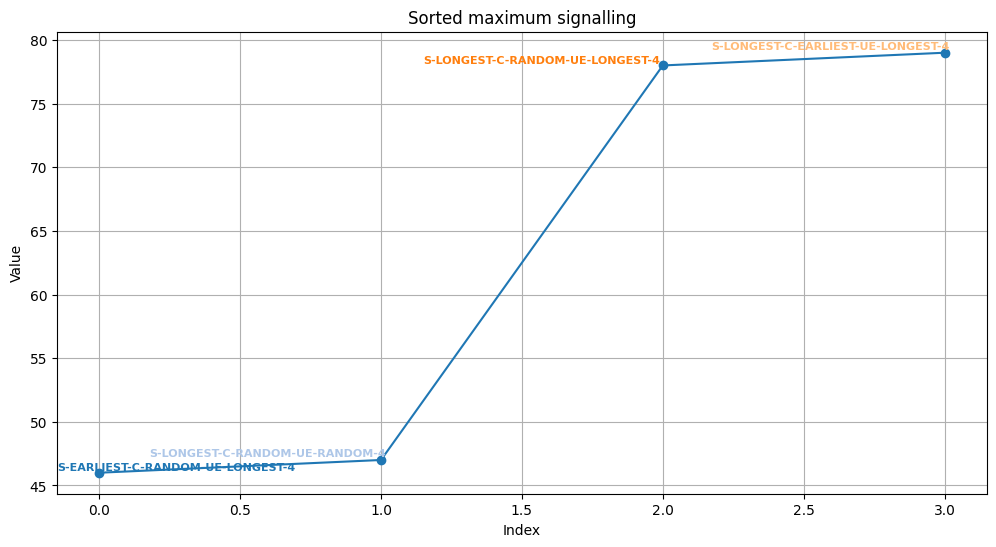

Overall, are we generating more signalling?


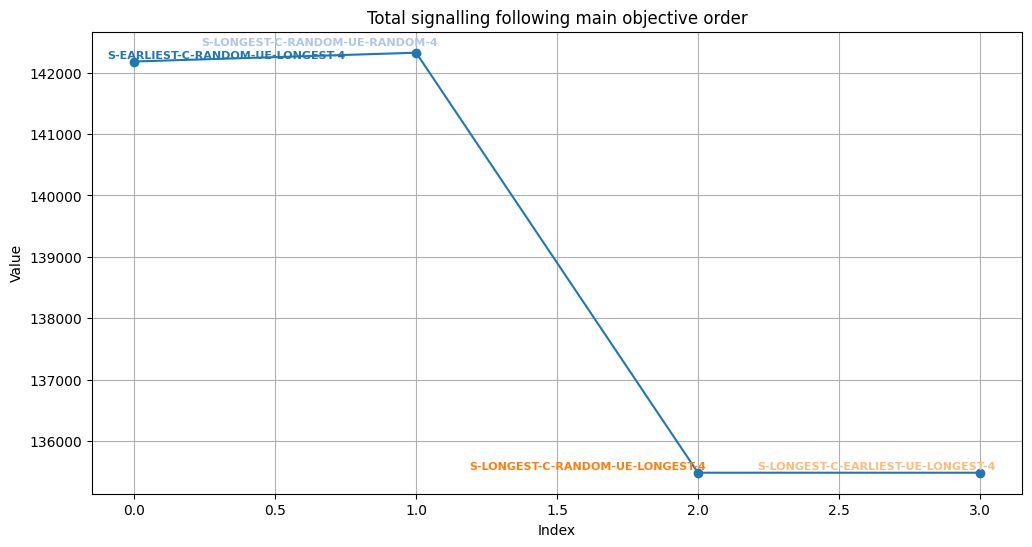

During busy time (top 25%), are we making the busy time more busy?


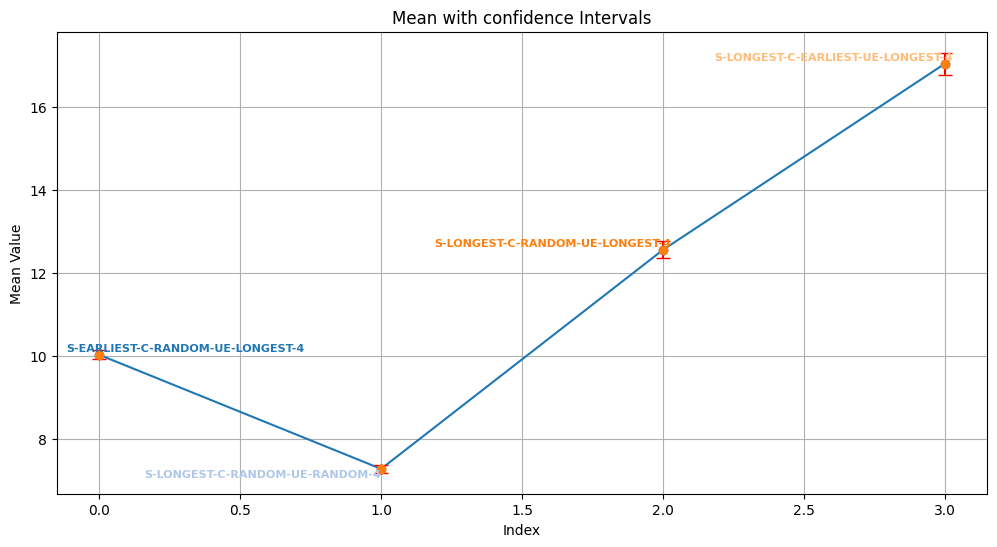

In [2]:
draw_numerical_result(result)

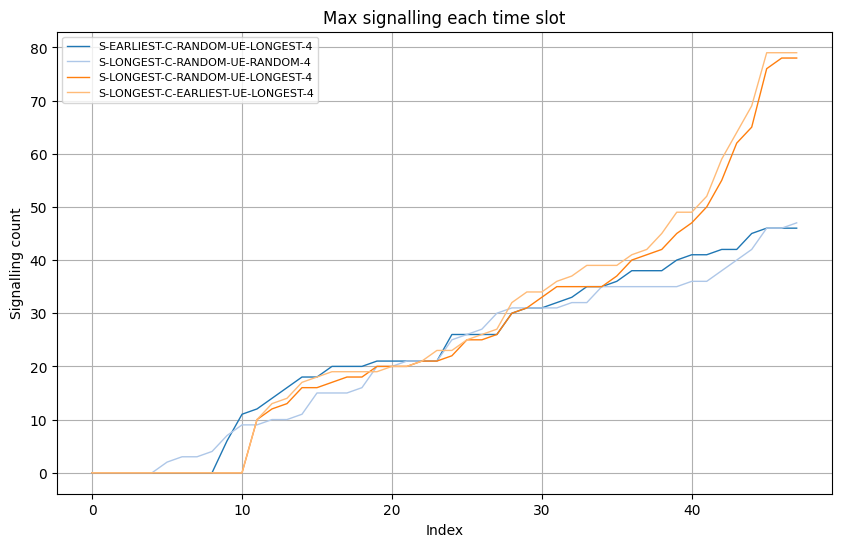

In [3]:
# The figure describes the maximum signalling of each satellite
draw_max_signalling(result)

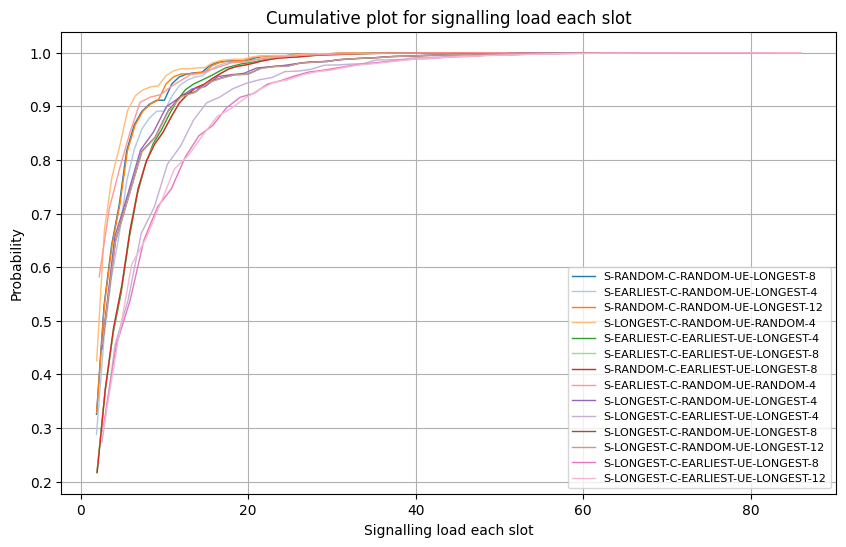

In [4]:
draw_cumulative_load_each_time(result)

Are there certain satellites handling much more signalling than others?


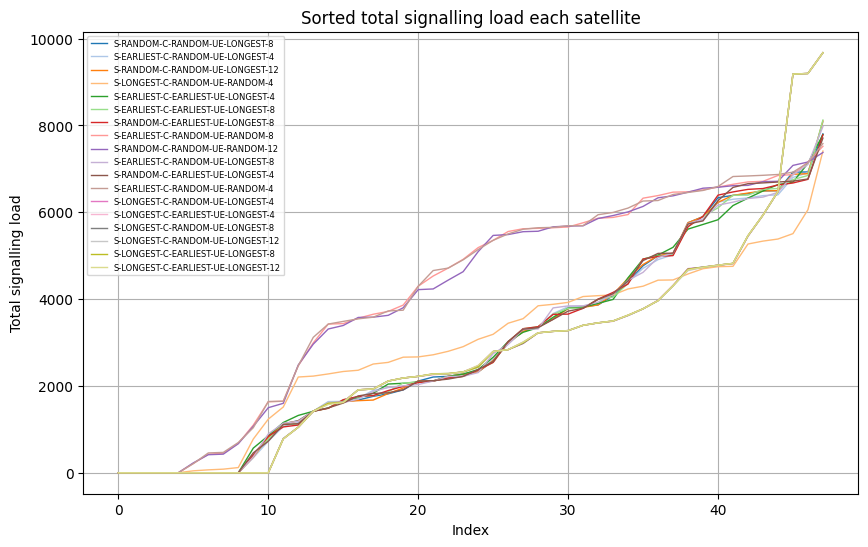

In [4]:
draw_total_load_each_satellite(result)

Are there certain satellites handling majority of the busy (top 25%) signalling slots? 


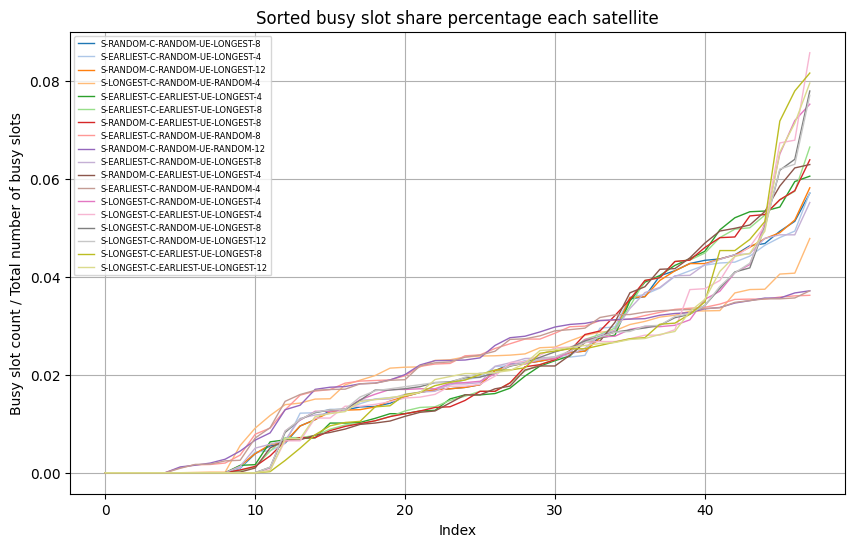

In [5]:
draw_busy_hour_distribution(result)

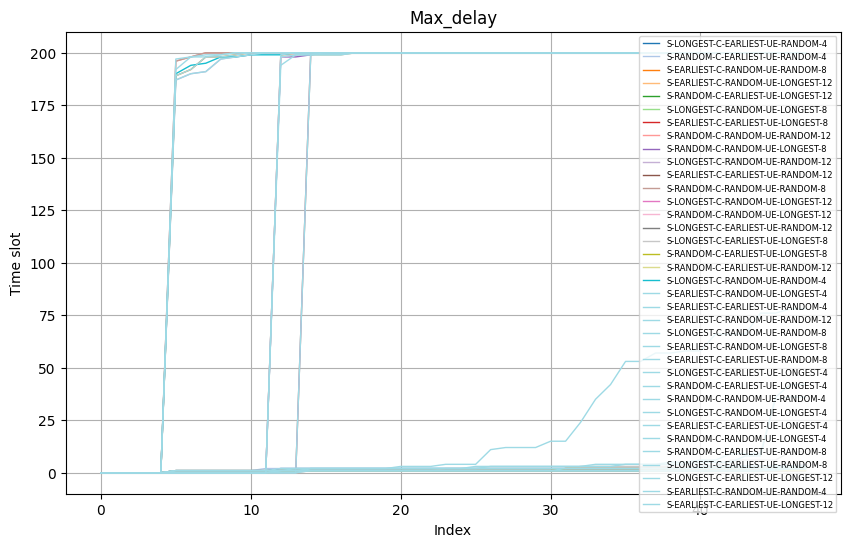

In [7]:
draw_max_access_slot(result)

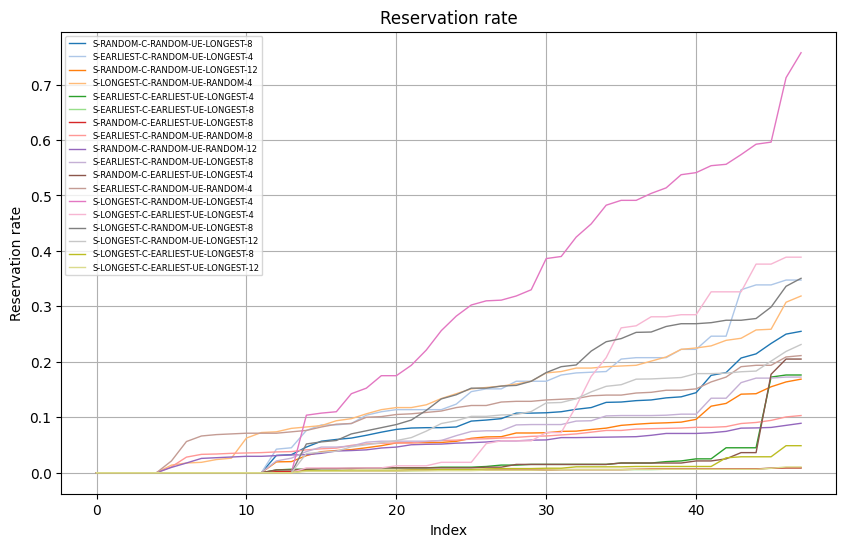

In [6]:
draw_max_reservation(result)

In [ ]:
draw_heatmap(result, 100)